In [1]:
#import libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
df_room_type = pd.read_excel(r"C:\Users\User\Downloads\airbnb_room_type.xlsx")

df_price = pd.read_csv(r"C:\Users\User\Downloads\airbnb_price.csv")

df_last_review = pd.read_csv(r"C:\Users\User\Downloads\airbnb_last_review.csv")

In [3]:
# Clean the price column (remove ' dollars' and convert to float)
df_price['price'] = df_price['price'].str.replace(' dollars', '', regex=False).astype(float)

In [4]:
#Standardize room_type (convert to lowercase)
df_room_type['room_type'] = df_room_type['room_type'].str.lower()

In [5]:
#Convert description to string to prevent 'int' len() error
df_room_type['description'] = df_room_type['description'].astype(str)

In [6]:
# Convert last_review to datetime by cleaning spaces from column names if they exist
df_last_review.columns = df_last_review.columns.str.strip()
df_last_review['last_review'] = pd.to_datetime(df_last_review['last_review'])

In [7]:
#Merge the dataframes
airbnb_merged = df_price.merge(df_room_type, on='listing_id').merge(df_last_review, on='listing_id')

In [8]:
#Extract Key Metrics
first_reviewed = airbnb_merged['last_review'].min()
last_reviewed = airbnb_merged['last_review'].max()
nb_private_rooms = airbnb_merged[airbnb_merged['room_type'] == 'private room'].shape[0]
avg_price = airbnb_merged['price'].mean()

In [9]:
#Create a summary DataFrame
review_dates = pd.DataFrame({
    'first_reviewed': [first_reviewed],
    'last_reviewed': [last_reviewed],
    'nb_private_rooms': [nb_private_rooms],
    'avg_price': [round(avg_price, 2)]
})

print(review_dates)

  first_reviewed last_reviewed  nb_private_rooms  avg_price
0     2019-01-01    2019-07-09             11356     141.78


In [10]:
# Split 'nbhood_full' into 'borough' and 'neighborhood'
airbnb_merged[['borough', 'neighborhood']] = airbnb_merged['nbhood_full'].str.split(', ', expand=True, n=1)

In [11]:
# Average price per borough
# This helps compare the cost of living/staying across the different parts of NYC
borough_prices = airbnb_merged.groupby('borough')['price'].mean().round(2).sort_values(ascending=False)

In [12]:
# Create Price Categories (Tiers)
# Grouping prices into Budget, Average, Expensive, and Extravagant
label_names = ["Budget", "Average", "Expensive", "Extravagant"]
ranges = [0, 69, 175, 350, 10000] 
airbnb_merged["price_category"] = pd.cut(airbnb_merged["price"], bins=ranges, labels=label_names)
price_cat_counts = airbnb_merged["price_category"].value_counts()

In [13]:
#Room type frequency (Counts)
room_type_counts = airbnb_merged['room_type'].value_counts()

In [14]:
#Top 5 most popular neighborhoods for listings
top_5_neighborhoods = airbnb_merged['neighborhood'].value_counts().head(5)

In [15]:
print("Average Price per Borough:\n", borough_prices)
print("----------------------------------------------")
print("\nRoom Type Distribution:\n", room_type_counts)
print("----------------------------------------------")
print("\nPrice Category Distribution:\n", price_cat_counts)
print("----------------------------------------------")
print("\nTop 5 Neighborhoods by Listings:\n", top_5_neighborhoods)

Average Price per Borough:
 borough
Manhattan        184.00
Brooklyn         121.90
Queens            92.81
Staten Island     86.04
Bronx             79.13
Name: price, dtype: float64
----------------------------------------------

Room Type Distribution:
 room_type
entire home/apt    13266
private room       11356
shared room          587
Name: count, dtype: int64
----------------------------------------------

Price Category Distribution:
 price_category
Average        12737
Budget          6488
Expensive       4875
Extravagant     1102
Name: count, dtype: int64
----------------------------------------------

Top 5 Neighborhoods by Listings:
 neighborhood
Bedford-Stuyvesant    2209
Williamsburg          1853
Harlem                1435
Bushwick              1202
Hell's Kitchen        1119
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_11052\1001782018.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_prices.index, y=borough_prices.values, palette="viridis")


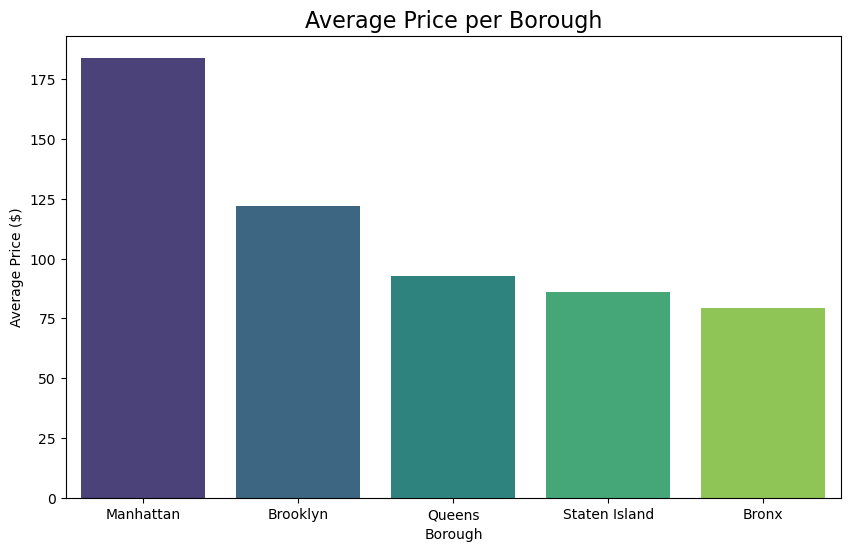

In [16]:
# Graph: Average Price per Borough
# (Assumes borough_prices is a Series from your previous code)
plt.figure(figsize=(10, 6))
sns.barplot(x=borough_prices.index, y=borough_prices.values, palette="viridis")
plt.title('Average Price per Borough', fontsize=16)
plt.ylabel('Average Price ($)')
plt.xlabel('Borough')
plt.show()

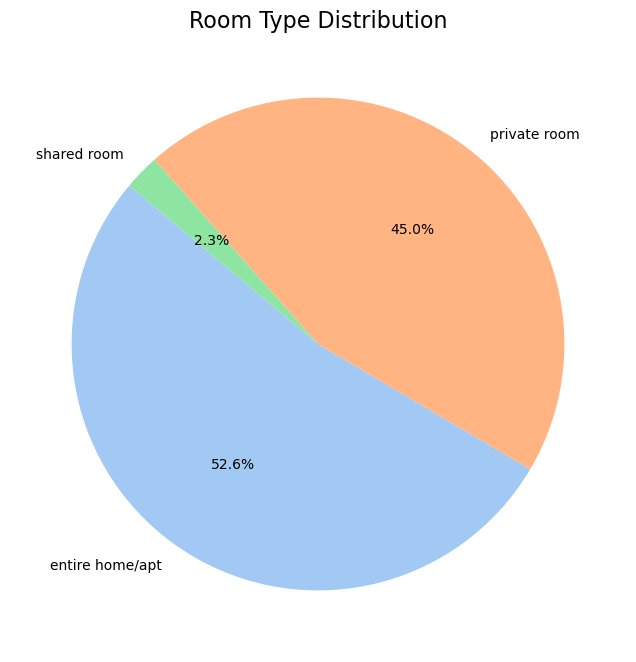

In [17]:
# Graph: Room Type Distribution (Pie Chart)
plt.figure(figsize=(8, 8))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette("pastel"))
plt.title('Room Type Distribution', fontsize=16)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11052\3545357682.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_cat_counts.index, y=price_cat_counts.values, palette="magma")


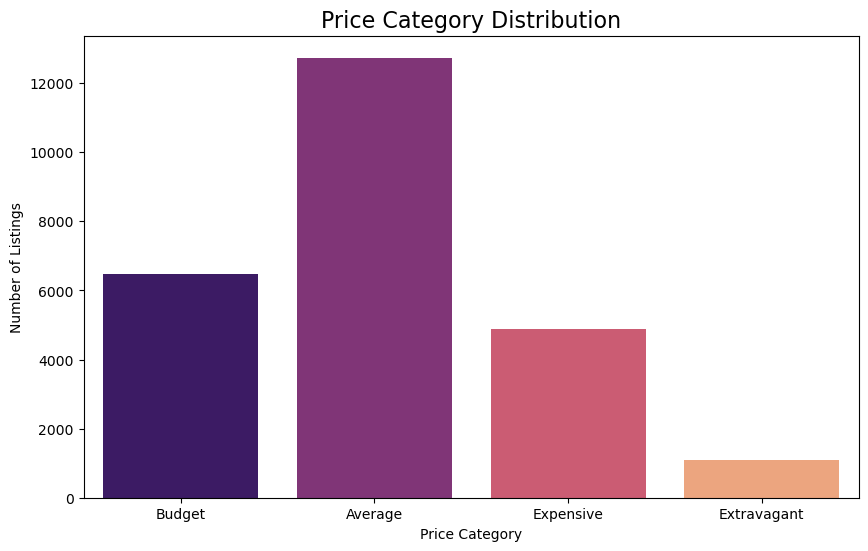

In [18]:
# Graph: Price Category Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=price_cat_counts.index, y=price_cat_counts.values, palette="magma")
plt.title('Price Category Distribution', fontsize=16)
plt.ylabel('Number of Listings')
plt.xlabel('Price Category')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11052\164517787.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_neighborhoods.values, y=top_5_neighborhoods.index, palette="rocket")


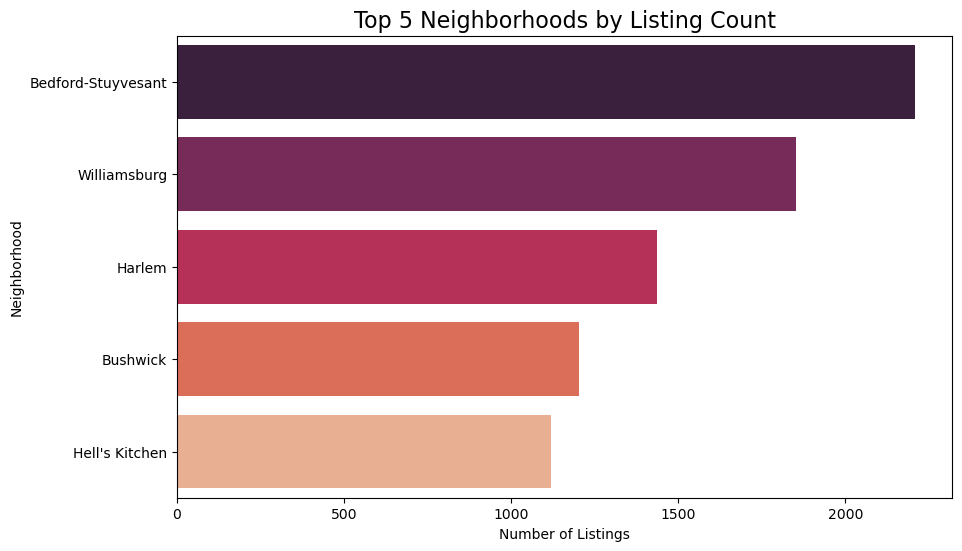

In [19]:
# Graph: Top 5 Neighborhoods by Listings (Horizontal Bar Chart)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_neighborhoods.values, y=top_5_neighborhoods.index, palette="rocket")
plt.title('Top 5 Neighborhoods by Listing Count', fontsize=16)
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.show()

In [20]:
#Review Trends (Monthly Activity)
airbnb_merged['review_month'] = airbnb_merged['last_review'].dt.to_period('M')
review_trend = airbnb_merged.groupby('review_month').size()

In [21]:
#Top Hosts by Listing Count
top_hosts = airbnb_merged['host_name'].value_counts().head(10)

In [22]:
#Cross-tab of Borough and Room Type
borough_room_type = pd.crosstab(airbnb_merged['borough'], airbnb_merged['room_type'])

In [23]:
#Description Length vs Price
#Description Length Correlation
airbnb_merged['desc_len'] = airbnb_merged['description'].apply(len)
desc_price_corr = airbnb_merged[['desc_len', 'price']].corr().iloc[0, 1]

In [24]:
#Busy Days of the Week
#Which day of the week do most "last reviews" fall on? 
airbnb_merged['review_day'] = airbnb_merged['last_review'].dt.day_name()
reviews_by_day = airbnb_merged['review_day'].value_counts()

In [25]:
#Average Price per Price Category
label_names = ["Budget", "Average", "Expensive", "Extravagant"]
ranges = [0, 69, 175, 350, 10000] 
airbnb_merged["price_category"] = pd.cut(airbnb_merged["price"], bins=ranges, labels=label_names)
avg_cat_price = airbnb_merged.groupby('price_category', observed=True)['price'].mean().round(2)

In [26]:
print(f"Correlation between Description Length and Price: {desc_price_corr:.4f}")
print("----------------------------------------------")
print("\nMost Common Checkout/Review Days:\n", reviews_by_day)
print("----------------------------------------------")
print("\nAverage Price by Category:\n", avg_cat_price)

Correlation between Description Length and Price: 0.0808
----------------------------------------------

Most Common Checkout/Review Days:
 review_day
Sunday       6360
Monday       4515
Saturday     3563
Tuesday      3018
Friday       2941
Wednesday    2565
Thursday     2247
Name: count, dtype: int64
----------------------------------------------

Average Price by Category:
 price_category
Budget          51.25
Average        113.34
Expensive      235.39
Extravagant    590.29
Name: price, dtype: float64


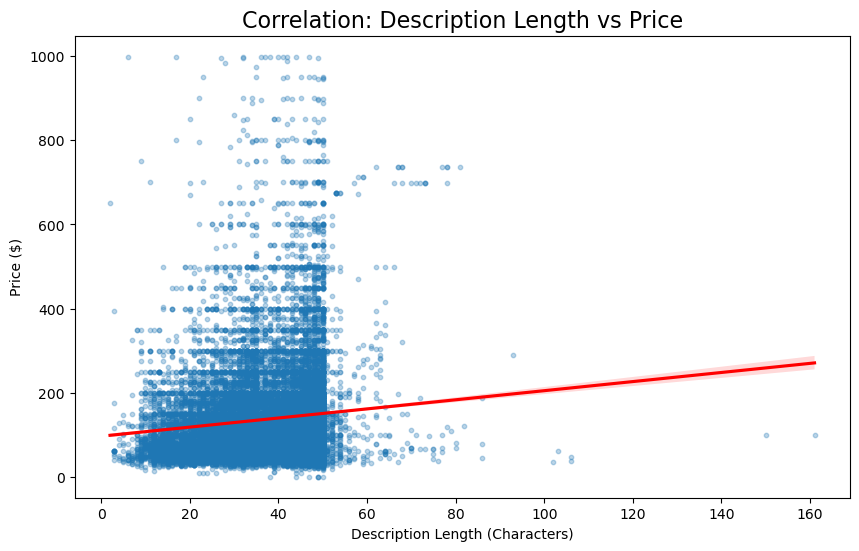

In [27]:
# Graph: Description Length vs Price (Correlation)
# Using a scatter plot with a regression line (red line) to see the trend
plt.figure(figsize=(10, 6))
# Note: Filtering price < 1000 for better visibility of the bulk of the data
sns.regplot(data=airbnb_merged[airbnb_merged['price'] < 1000], x='desc_len', y='price', 
            scatter_kws={'alpha':0.3, 's':10}, line_kws={'color':'red'})
plt.title('Correlation: Description Length vs Price', fontsize=16)
plt.xlabel('Description Length (Characters)')
plt.ylabel('Price ($)')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11052\3670916573.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reviews_by_day.index, y=reviews_by_day.values, palette="coolwarm")


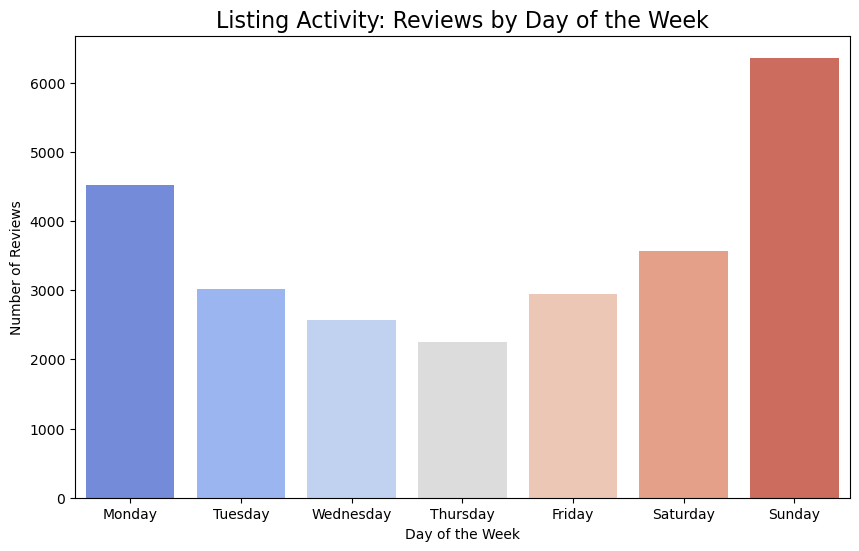

In [28]:
# Graph: Most Common Review Days
# Ensuring days are in chronological order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
reviews_by_day = airbnb_merged['review_day'].value_counts().reindex(day_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=reviews_by_day.index, y=reviews_by_day.values, palette="coolwarm")
plt.title('Listing Activity: Reviews by Day of the Week', fontsize=16)
plt.ylabel('Number of Reviews')
plt.xlabel('Day of the Week')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11052\1134742614.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cat_price.index, y=avg_cat_price.values, palette="YlGnBu")


Text(0.5, 0, 'Price Category')

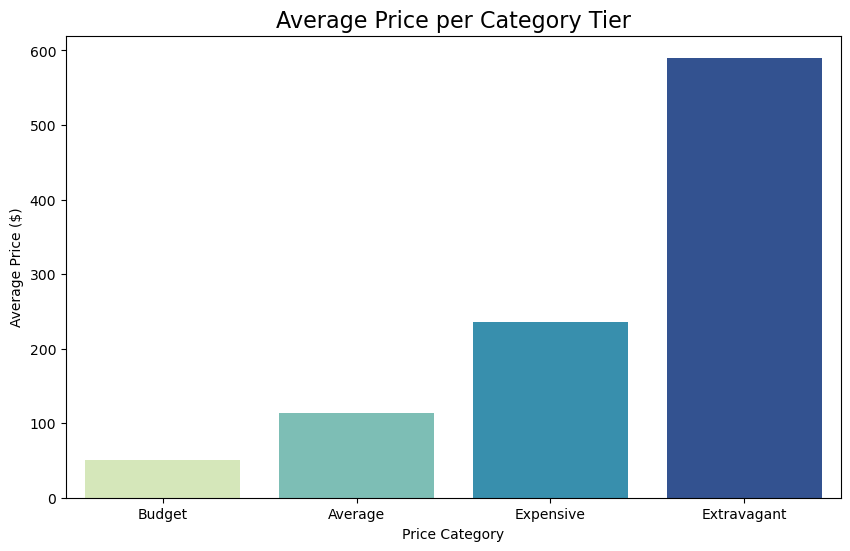

In [29]:
# Graph: Average Price by Category Tier
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_cat_price.index, y=avg_cat_price.values, palette="YlGnBu")
plt.title('Average Price per Category Tier', fontsize=16)
plt.ylabel('Average Price ($)')
plt.xlabel('Price Category')

In [30]:
#Price Volatility (Standard Deviation) by Borough
borough_volatility = airbnb_merged.groupby('borough')['price'].std().round(2)

In [31]:
#Keyword Analysis: Price impact of specific words
keywords = ['luxury', 'quiet', 'subway', 'spacious', 'modern', 'cozy']
keyword_results = []
for word in keywords:
    avg_p = airbnb_merged[airbnb_merged['description'].str.contains(word, case=False)]['price'].mean()
    keyword_results.append({'keyword': word, 'avg_price': round(avg_p, 2)})
keyword_df = pd.DataFrame(keyword_results).sort_values(by='avg_price', ascending=False)

In [32]:
#Borough Price Category Mix (%)
borough_price_dist = pd.crosstab(airbnb_merged['borough'], airbnb_merged['price_category'], normalize='index') * 100

In [33]:
#Listing Recency Analysis
max_date = airbnb_merged['last_review'].max()
airbnb_merged['days_since_review'] = (max_date - airbnb_merged['last_review']).dt.days

def categorize_recency(days):
    if days <= 7: return 'Very Recent (Last week)'
    if days <= 30: return 'Recent (Last month)'
    return 'Older'

airbnb_merged['recency_group'] = airbnb_merged['days_since_review'].apply(categorize_recency)
recency_counts = airbnb_merged['recency_group'].value_counts()

In [34]:
print("Price Volatility by Borough:\n", borough_volatility)
print("----------------------------------------------")
print("\nKeyword Price Impact:\n", keyword_df)
print("----------------------------------------------")
print("\nBorough Price Category Breakdown (%):\n", borough_price_dist.round(2))
print("----------------------------------------------")
print("\nListing Recency Status:\n", recency_counts)

Price Volatility by Borough:
 borough
Bronx             58.09
Brooklyn         123.96
Manhattan        178.18
Queens            78.51
Staten Island     54.62
Name: price, dtype: float64
----------------------------------------------

Keyword Price Impact:
     keyword  avg_price
0    luxury     242.73
4    modern     159.35
3  spacious     141.21
1     quiet     122.83
2    subway     110.35
5      cozy     103.66
----------------------------------------------

Borough Price Category Breakdown (%):
 price_category  Budget  Average  Expensive  Extravagant
borough                                                
Bronx            54.66    41.03       3.59         0.72
Brooklyn         30.60    52.91      14.02         2.48
Manhattan        11.14    51.24      29.77         7.85
Queens           47.22    43.55       8.42         0.81
Staten Island    46.44    46.07       7.49         0.00
----------------------------------------------

Listing Recency Status:
 recency_group
Recent (Last mon

C:\Users\User\AppData\Local\Temp\ipykernel_11052\1703676361.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_volatility.index, y=borough_volatility.values, palette="mako")


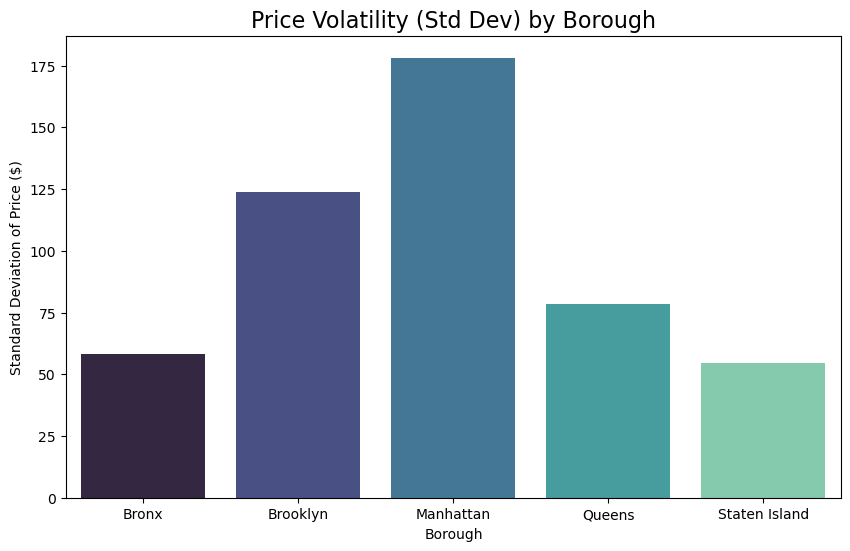

In [35]:
#Graph: Price Volatility (Standard Deviation) by Borough
plt.figure(figsize=(10, 6))
sns.barplot(x=borough_volatility.index, y=borough_volatility.values, palette="mako")
plt.title('Price Volatility (Std Dev) by Borough', fontsize=16)
plt.ylabel('Standard Deviation of Price ($)')
plt.xlabel('Borough')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11052\3704596541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='keyword', y='avg_price', data=keyword_df, palette="flare")


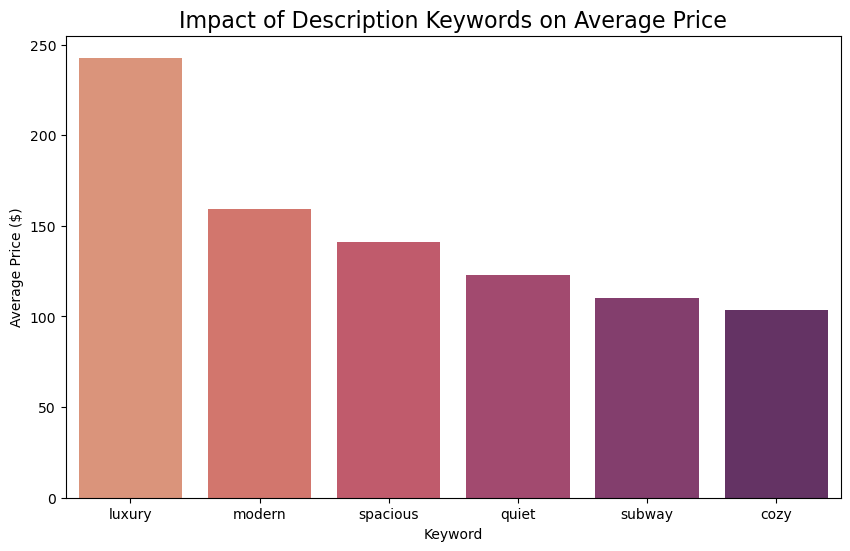

In [36]:
#Graph: Keyword Price Impact
plt.figure(figsize=(10, 6))
sns.barplot(x='keyword', y='avg_price', data=keyword_df, palette="flare")
plt.title('Impact of Description Keywords on Average Price', fontsize=16)
plt.ylabel('Average Price ($)')
plt.xlabel('Keyword')
plt.show()

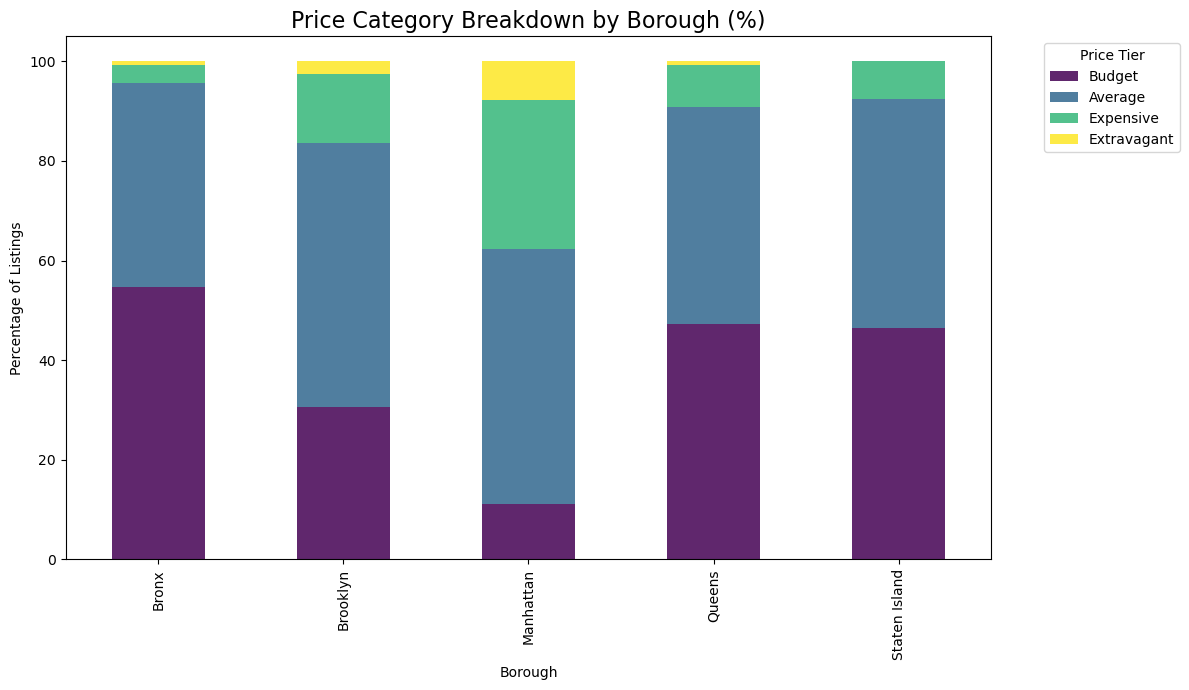

In [37]:
# Graph: Borough Price Category Breakdown (Stacked %)
# This shows the "market mix" of each borough
borough_price_dist.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis', alpha=0.85)
plt.title('Price Category Breakdown by Borough (%)', fontsize=16)
plt.ylabel('Percentage of Listings')
plt.xlabel('Borough')
plt.legend(title='Price Tier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11052\1296203376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recency_counts.index, y=recency_counts.values, palette="cubehelix")


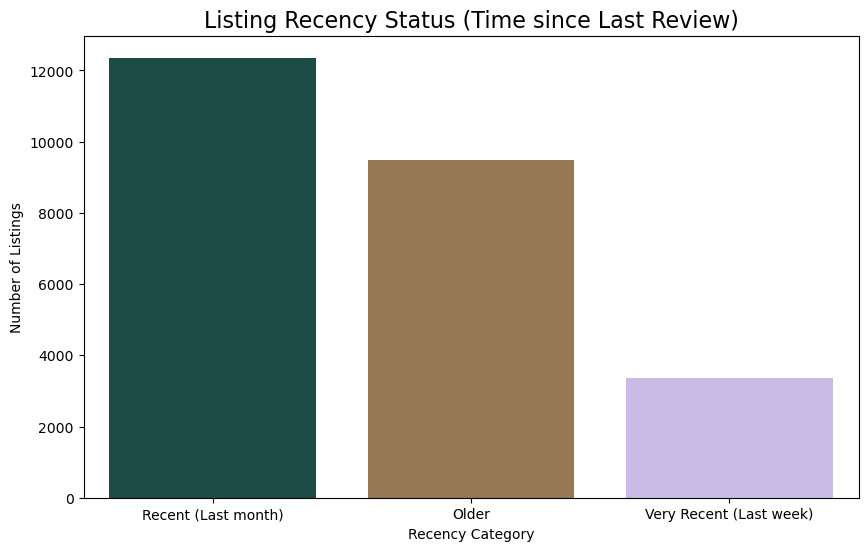

In [38]:
#Graph: Listing Recency Status
plt.figure(figsize=(10, 6))
sns.barplot(x=recency_counts.index, y=recency_counts.values, palette="cubehelix")
plt.title('Listing Recency Status (Time since Last Review)', fontsize=16)
plt.ylabel('Number of Listings')
plt.xlabel('Recency Category')
plt.show()

In [39]:
#Professional vs. Individual Hosts
host_counts = airbnb_merged['host_name'].value_counts()
airbnb_merged['host_type'] = airbnb_merged['host_name'].apply(lambda x: 'Professional' if host_counts.get(x, 0) > 1 else 'Individual')
host_type_price = airbnb_merged.groupby('host_type')['price'].mean().round(2)

In [40]:
#Extreme Neighborhoods per Borough (min 20 listings)
nb_counts = airbnb_merged['neighborhood'].value_counts()
popular_nbs = nb_counts[nb_counts >= 20].index
df_popular = airbnb_merged[airbnb_merged['neighborhood'].isin(popular_nbs)]

nb_stats = df_popular.groupby(['borough', 'neighborhood'])['price'].mean().reset_index().round(2)
best_value = nb_stats.loc[nb_stats.groupby('borough')['price'].idxmin()]
luxury_hub = nb_stats.loc[nb_stats.groupby('borough')['price'].idxmax()]

In [41]:
#Shared Room Statistics by Borough
shared_room_stats = airbnb_merged[airbnb_merged['room_type'] == 'shared room'].groupby('borough').agg(
    avg_price=('price', 'mean'),
    listing_count=('price', 'count')
)

In [42]:
print("Host Type Comparison:\n", host_type_price)
print("----------------------------------------------")
print("\nCheapest Neighborhoods by Borough:\n", best_value)
print("----------------------------------------------")
print("\nMost Expensive Neighborhoods by Borough:\n", luxury_hub)

Host Type Comparison:
 host_type
Individual      148.39
Professional    140.36
Name: price, dtype: float64
----------------------------------------------

Cheapest Neighborhoods by Borough:
            borough  neighborhood  price
7            Bronx   Parkchester  55.83
17        Brooklyn  Borough Park  64.95
60       Manhattan        Inwood  85.94
82          Queens        Corona  55.67
108  Staten Island       Concord  53.30
----------------------------------------------

Most Expensive Neighborhoods by Borough:
            borough      neighborhood   price
12           Bronx    Williamsbridge  100.62
19        Brooklyn  Brooklyn Heights  213.31
72       Manhattan           Tribeca  396.70
80          Queens           Bayside  185.96
109  Staten Island        St. George  100.06


C:\Users\User\AppData\Local\Temp\ipykernel_11052\548457166.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=host_type_price.index, y=host_type_price.values, palette="Set2")


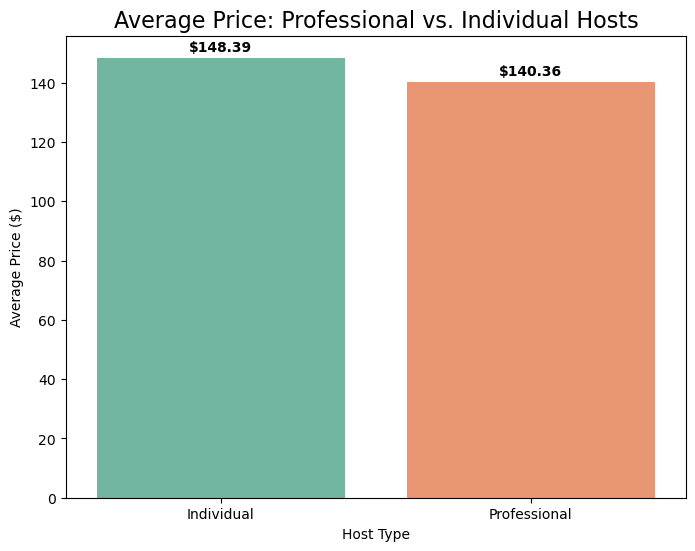

In [43]:
#Graph: Host Type Comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=host_type_price.index, y=host_type_price.values, palette="Set2")
plt.title('Average Price: Professional vs. Individual Hosts', fontsize=16)
plt.ylabel('Average Price ($)')
plt.xlabel('Host Type')
# Add price labels on top of bars
for i, val in enumerate(host_type_price.values):
    plt.text(i, val + 2, f'${val:.2f}', ha='center', fontweight='bold')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11052\2057692971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='price', data=best_value, palette="GnBu")


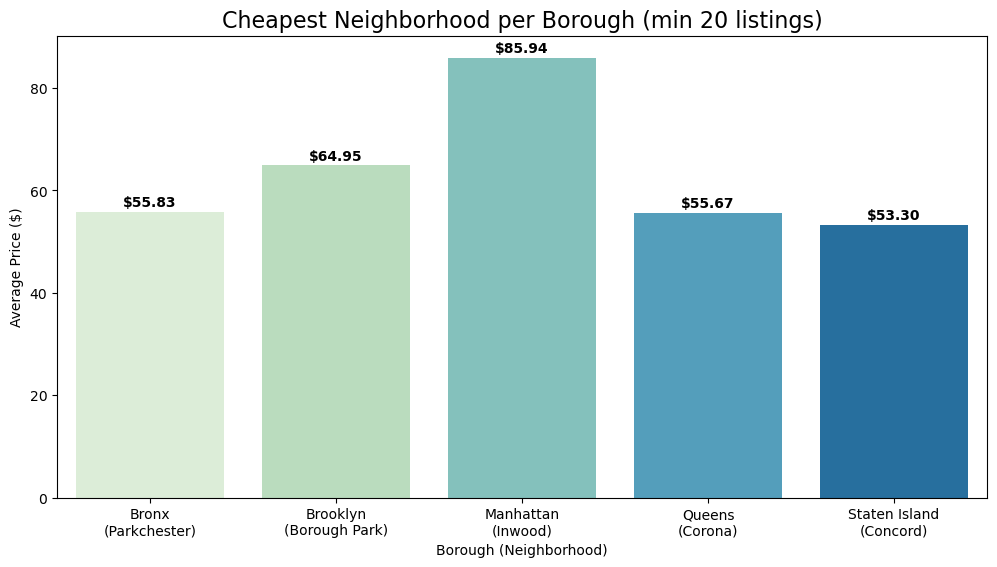

In [44]:
#Graph: Cheapest Neighborhoods by Borough
# Create a combined label for the X-axis: Borough (Neighborhood)
best_value['label'] = best_value['borough'] + "\n(" + best_value['neighborhood'] + ")"

plt.figure(figsize=(12, 6))
sns.barplot(x='label', y='price', data=best_value, palette="GnBu")
plt.title('Cheapest Neighborhood per Borough (min 20 listings)', fontsize=16)
plt.ylabel('Average Price ($)')
plt.xlabel('Borough (Neighborhood)')
for i, val in enumerate(best_value['price']):
    plt.text(i, val + 1, f'${val:.2f}', ha='center', fontweight='bold')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11052\2555820496.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='label', y='price', data=luxury_hub, palette="OrRd")


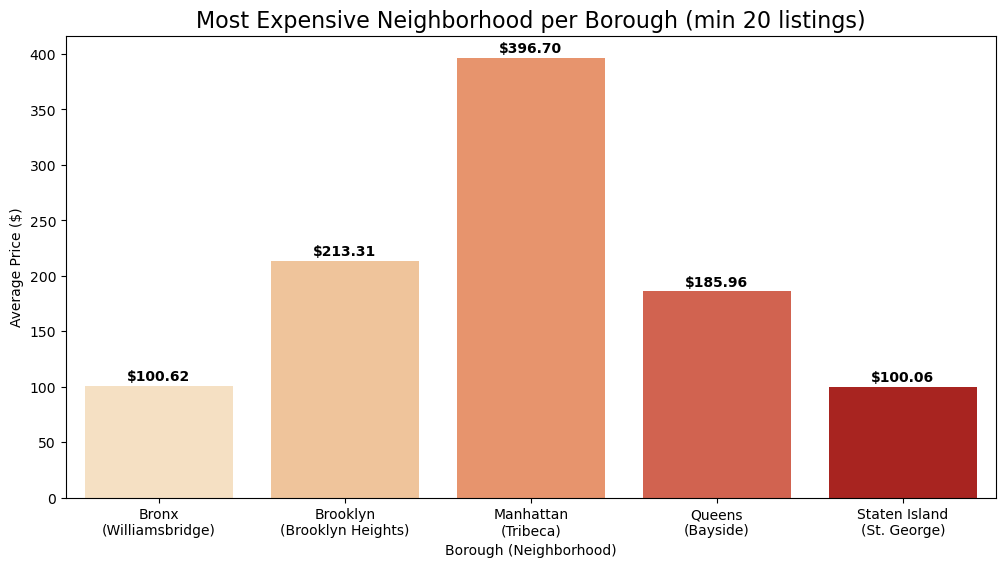

In [45]:
#Graph: Most Expensive Neighborhoods by Borough
luxury_hub['label'] = luxury_hub['borough'] + "\n(" + luxury_hub['neighborhood'] + ")"

plt.figure(figsize=(12, 6))
sns.barplot(x='label', y='price', data=luxury_hub, palette="OrRd")
plt.title('Most Expensive Neighborhood per Borough (min 20 listings)', fontsize=16)
plt.ylabel('Average Price ($)')
plt.xlabel('Borough (Neighborhood)')
for i, val in enumerate(luxury_hub['price']):
    plt.text(i, val + 5, f'${val:.2f}', ha='center', fontweight='bold')
plt.show()